# Práctica Python Avanzado
## Máster en Data Science, Big Data y Business Intelligence, UCM
#### Profesor: Javier Domínguez Gómez
#### Autor: Miguel Mitsou Errandonea

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# main dataframe initialization
df = None

def set_hostnames(number_of_hosts):
    list_of_hostnames = []
    # this function generates a number_of_hosts of semi-random hostnames, following a simple set of rules.
    # hostnames are constructed with letters and numbers. the letters describe the operating system, environment
    # and country of the host. The digits represent the node of the host.
    os_letters_list = ['L', 'S', 'A', 'H']
    operating_system_weights = [0.4, 0.3, 0.2, 0.1]

    # environment variables:
    environment_letters_list = ['D','I','S','T','P']
    environment_letters_weights = [0.1, 0.1, 0.25, 0.25, 0.3]

    # country variables:
    country_letters_list = ['NOR','FRA', 'ITA', 'ESP', 'DEU', 'IRL']
    country_weights = [0.06, 0.09, 0.16, 0.16, 0.23, 0.3]
    
    #initialization of a temporary group for letters of the hostname
    temp_group =[]

    if not isinstance(number_of_hosts, int):
        # checks if number_of_hosts is an int
        # if numer_of_hosts is not an integer, the user will be prompted to insert a valid 'int' character
        number_of_hosts = int(input('Invalid key for number of hosts. Please, enter an integer:'))
        set_hostnames(number_of_hosts)

    else:
        # if it is an integer, the function continues.
        # this function will create a "number_of_hosts" number of unique hosts, combining letters and numbers
        # according to OS, country and environment as well as node number
        
        for i in range(1, number_of_hosts+1):
            # chooses random os, environment and country letters according to the weights list:
            os_letter = random.choices(os_letters_list, weights=operating_system_weights) 
            environment_letter = random.choices(environment_letters_list, weights=environment_letters_weights)
            country_letter = random.choices(country_letters_list, weights=country_weights)
            
            # concatenates the letters and adds them to a temporary list in order to count the number of node
            # for each unique combination of letters
            hostname_letters = os_letter[0]+environment_letter[0]+country_letter[0]
            temp_group.append(hostname_letters)
            
            # to get the node number, we count the number of hostnames of the same combination of letters and 
            # append this number to the hostname code
            code_digits = str(temp_group.count(hostname_letters)).zfill(3)
            hostname = hostname_letters+code_digits
            
            # finally, we add each unique hostname to the list of hostnames
            list_of_hostnames.append(hostname)

    return list_of_hostnames

In [2]:
# These three functions to get the environment, OS and country for each hostname are pretty straight forward.
# Each function checks the letter or node number and saves the full name into a variable
def get_os(hostname):
    if hostname[0][0] == 'L':
        os_name = 'Linux'
    elif hostname[0][0] == 'S':
        os_name = 'Solaris'
    elif hostname[0][0] == 'A':
        os_name = 'AIX'
    elif hostname[0][0] == 'H':
        os_name = 'HP-UX'
    else:
        os_name = 'Unknown'

    return str(os_name)

def get_environment(hostname):
    letter_list = []
    for letter in hostname:
        letter_list.append(letter)
    if letter_list[1] == 'D':
        env_name = 'Development'
    elif letter_list[1] == 'I':
        env_name = 'Integration'
    elif letter_list[1] == 'T':
        env_name = 'Testing'
    elif letter_list[1] == 'S':
        env_name = 'Staging'
    elif letter_list[1] == 'P':
        env_name = 'Production'
    else:
        env_name = 'Unknown'

    return str(env_name)

def get_country(hostname):

    if hostname[2:5] == 'NOR':
        country_name = 'Norway'
    elif hostname[2:5] == 'DEU':
        country_name = 'Germany'
    elif hostname[2:5] == 'ITA':
        country_name = 'Italy'
    elif hostname[2:5] == 'ESP':
        country_name = 'Spain'
    elif hostname[2:5] == 'IRL':
        country_name = 'Ireland'
    elif hostname[2:5] == 'FRA':
        country_name = 'France'
    else:
        country_name = 'Unknown'

    return country_name



In [3]:
def set_dataframe(count):
    # this function creates a dataframe from the hostnames that are going to be generated with the
    # set_hostnames function. This function outputs a pandas DataFrame with "count"-number of rows and
    # and 5 columns: hostname ID, OS, country and environment
    global df
    # we first intialize the lists for each column
    list_of_os = []
    list_of_environments = []
    list_of_countries = []
    list_of_nodes = []
    
    # we get the hostnames with the set_hostnames function
    list_of_hostnames = set_hostnames(count)


    for element in list_of_hostnames:
        # we add each variable to its relevant list
        list_of_os.append(get_os(element))
        list_of_environments.append(get_environment(element))
        list_of_countries.append(get_country(element))
        list_of_nodes.append(element[-3:])

    # a dictionary is created with each variable list
    hostname_dictionary = {'hostname': list_of_hostnames,
                           'os':list_of_os,
                           'environment':list_of_environments,
                           'country': list_of_countries,
                           'node': list_of_nodes
                           }
    # and with this dictionary, we create a pandas DataFrame, which will be the function's output:
    hostname_df = pd.DataFrame(hostname_dictionary)
    
    return hostname_df

In [4]:
# we will create a df with 1500 hostnames, save it to a .csv file and read it. Then, we will print the dataframe to 
# check it out
df = set_dataframe(1500)
df.to_csv('hosts_df.csv',
          header=True,
          index=False,
          sep=','
          )

df_hosts = pd.read_csv('hosts_df.csv')
df_hosts

,hostname,os,environment,country,node
0,STESP001,Solaris,Testing,Spain,1
1,ASESP001,AIX,Staging,Spain,1
2,LTNOR001,Linux,Testing,Norway,1
3,ATIRL001,AIX,Testing,Ireland,1
4,ATDEU001,AIX,Testing,Germany,1
...,...,...,...,...,...
1495,ADIRL012,AIX,Development,Ireland,12
1496,SPDEU035,Solaris,Production,Germany,35
1497,HDITA003,HP-UX,Development,Italy,3
1498,ATESP010,AIX,Testing,Spain,10


In [5]:
# looks good!

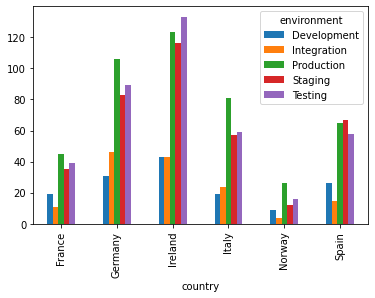

In [6]:
# now we will generate a bar graph with environment by country, using the value_counts() method
counts_df = df_hosts[['country', 'environment']].value_counts()
# the generated table must be unstacked in order to generate a neat graph which can be used
# to plot the bar grapth
country_env_df = counts_df.unstack(level = -1)
country_env_df.plot(kind='bar')
plt.show()

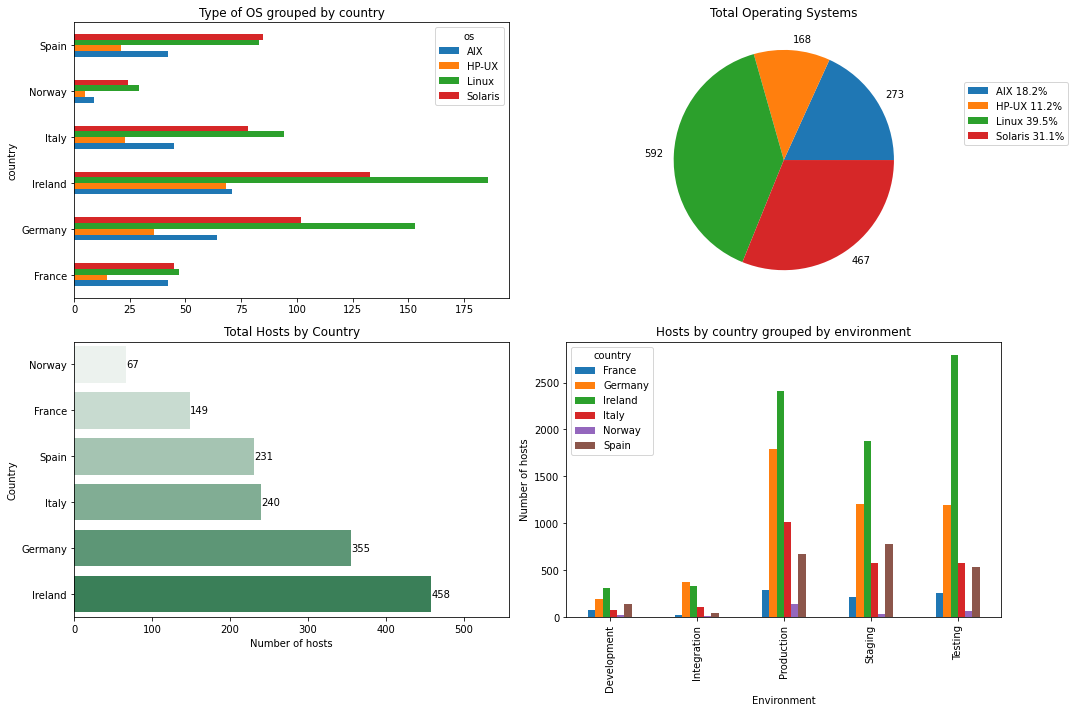

In [12]:
# now, we will generate a plot matrix of 2 by 2 graphs.
# plot initialization:
fig, axs = plt.subplots(2,2, figsize = (15, 10))

# first plot: type of OS grouped by country
df_os_country = df_hosts.groupby(['country', 'os']).count().unstack(level = -1)['node']
df_os_country.plot(ax = axs[0,0], kind = 'barh', title='Type of OS grouped by country')


# second plot: total operating systems
df_total_os = df_hosts.groupby(['os']).count()['node'] # we index with 'node' since all values are repeated 
                                                       # on all generated columns, so we will just keep one

labels = df_total_os.values *100 / df_total_os.sum() # we calculate the % of each operating system and store it in a
                                                     # variable that will be later used in the legend.
labels = labels.round(1) # we round the decimals to just one max.

label_names = ['AIX', 'HP-UX', 'Linux', 'Solaris']
# we initialize a list of the label numbers for the legend
label_numbers =[]
for i in labels:
    # each % value we convert it to str and add a "%" symbol after it
    a = str(i)+'%'
    label_numbers.append(a)

label_list = []
for name, number in zip(label_names, label_numbers):
    # now, for each label, we will join the label name and its % value and append it to a list
    # this list will be the legend for the plot
    a = name+' '+number
    label_list.append(a)

axs[0,1].pie(df_total_os,
             labels = df_total_os,
             radius = 1,
             labeldistance = 1.1)
axs[0,1].legend(label_list,
                loc = 'upper right',
                bbox_to_anchor=(0.8, 0., 0.75, 0.8))

axs[0,1].set_title('Total Operating Systems')

# third plot: total hosts by country.
# we will use the value_counts() pandas method to count the number
# of hosts, on the country column of the hosts df. we will use seaborn to plot the result into a horizontal bar plot.
df_hosts_country = pd.DataFrame(df_hosts[['country']].value_counts())
df_hosts_country= df_hosts_country.reset_index()
plot_order = df_hosts_country.groupby('country')['count'].sum().sort_values(ascending = True).index.values

sns.barplot(data = df_hosts_country,
            x = df_hosts_country['count'],
            y = df_hosts_country['country'],
            orient= 'h',
            order= plot_order,
            palette = sns.light_palette('seagreen'),
            ax=axs[1,0]
            )

axs[1,0].bar_label(container = axs[1,0].containers[0],  fontsize = 10) 
axs[1,0].set_xlim(right=df_hosts_country['count'].max() +100) # the task stated we should set a margin of +100 the 
                                                        # total number of hosts but I set it to +100 the highest 
                                                        # number in the df since otherwise there was too much space.
axs[1,0].set_xlabel('Number of hosts')
axs[1,0].set_ylabel('Country')
axs[1,0].set_title('Total Hosts by Country')

# fourth plot: hosts by country grouped by environment
# we use the groupby pandas fucntion and unstack the new dataframe to obtain a simple dataframe
# the number of hosts by environment and country. Then, we plot it into a bar graph
df_env_countries = df_hosts.groupby(['country', 'environment'])['node'].sum()
df_env_countries = df_env_countries.unstack(level=0)
df_env_countries.plot(kind = 'bar', ax=axs[1,1])
axs[1,1].set_xlabel('Environment')
axs[1,1].set_ylabel('Number of hosts')
axs[1,1].set_title('Hosts by country grouped by environment')

fig.tight_layout()

plt.show()
plt.close()

In [9]:
df_hosts_country

,country,count
0,Ireland,458
1,Germany,355
2,Italy,240
3,Spain,231
4,France,149
5,Norway,67
